In [1]:
import pandas as pd
import os
import joblib
import xgboost
import shap
import numpy as np

/usr/local/lib/python3.10/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [123]:
features_path = './data/features/'

test_file_name = 'Amazon_test.json'

df_test = pd.read_json(os.path.join(features_path, test_file_name))

In [30]:
# clf = joblib.load('clf.joblib')


In [31]:
bow_columns = ['bow_' + i for i in clf.named_steps['preprocessor'].named_transformers_['text'].get_feature_names_out()]
columns = bow_columns + list(df_test.iloc[:, 1:-1].columns)
transformed_data = pd.DataFrame(clf.named_steps['preprocessor'].transform(df_test.iloc[:, 1:]).toarray(), columns = columns)

labels = df_test.iloc[:, 0].to_frame()

In [32]:
transformed_data

,bow_able,bow_access,bow_account,bow_actually,bow_add,bow_adobe,bow_allow,bow_amazon,bow_anti,bow_app,...,summary_length,reviewText_length,season_spring,season_summer,season_autumn,season_winter,cat_software,cat_beauty,cat_fashion,cat_appliances
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.989872,-0.471241,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.457915,-0.262624,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,...,-0.438334,-0.010845,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.989872,-0.557565,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.989872,-0.537422,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,-0.507276,3.739937,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.989872,-0.571952,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.438334,-0.452537,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.300450,-0.387794,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
model = xgboost.XGBRegressor().fit(transformed_data, labels)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [34]:
shap.initjs()  # Inicjalizacja obsługi wizualizacji opartych na JavaScript w notebooku
# explainer = shap.TreeExplainer(clf.named_steps['clf'])  # Inicjalizacja modułu dla konkretnego modelu
explainer = shap.TreeExplainer(model)  # Inicjalizacja modułu dla konkretnego modelu
shap_values = explainer(transformed_data, check_additivity=False ) # Obliczenie wartości shap

In [35]:
shap.plots.force(shap_values[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


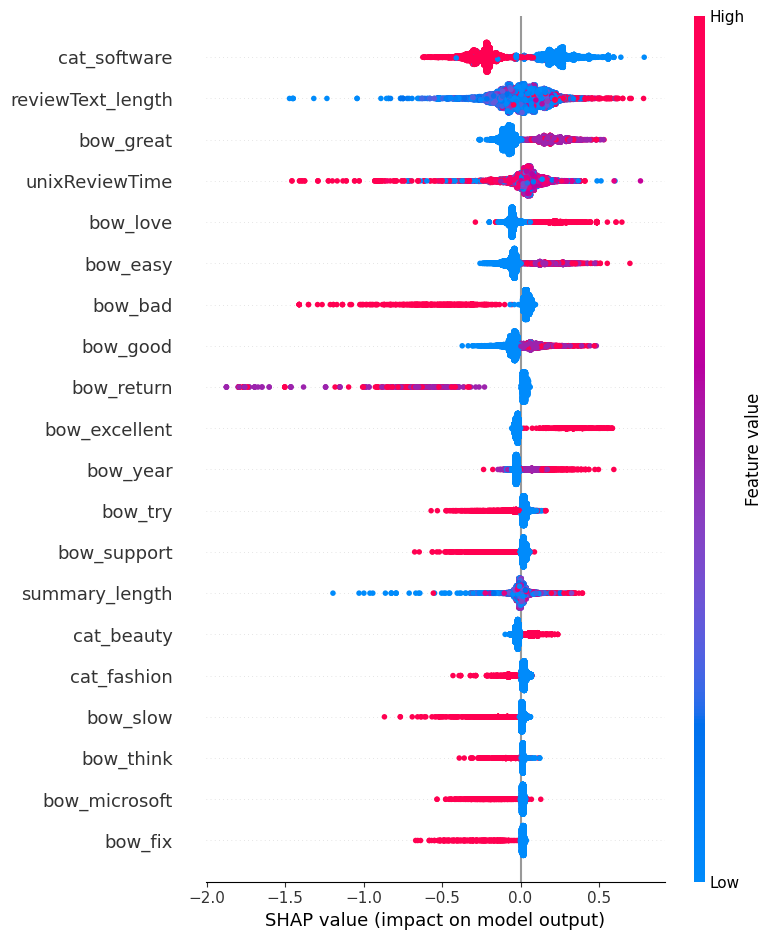

In [44]:
shap.summary_plot(shap_values)

In [124]:
misclassified_indices = np.where(model.predict(transformed_data).astype(int) - labels['overall'] > 2)[0]
misclassified_index = misclassified_indices[0]

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [125]:
misclassified_index

2184

In [126]:
print('Predict', int(model.predict(transformed_data.iloc[[misclassified_index], :])))

print('True val', labels.iloc[[misclassified_index], :]['overall'])

Predict 4
True val 7706    1
Name: overall, dtype: int64


In [128]:
df_test.iloc[[misclassified_index], :]

,overall,unixReviewTime,summary_length,reviewText_length,season_spring,season_summer,season_autumn,season_winter,cat_software,cat_beauty,cat_fashion,cat_appliances,text_data
7706,1,1515542400,4,27,0,0,0,1,0,0,1,0,star artculo equivocado en color


In [129]:
misclassified_explanation = explainer(transformed_data.iloc[[misclassified_index], :])

shap.plots.force(
    base_value=explainer.expected_value,
    shap_values=misclassified_explanation.values,
    features=transformed_data.iloc[[misclassified_index], :],
    feature_names=transformed_data.columns
)